# Importing the packages

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from pickle import dump, load

# Reading the File

In [314]:
df = pd.read_csv('loan_data.csv')
df_1 = df

# Exploratory Data Analysis

In [315]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [316]:
df_1.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [317]:
df_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [318]:
df_1['annual.inc'] = np.exp(df_1['log.annual.inc'])
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
 14  annual.inc         9578 non-null   float64
dtypes: float64(7), int64(7), object(1)
memory usage: 1.1+ MB


In [319]:
df_1.drop(columns='log.annual.inc', axis = 1,inplace=True)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   dti                9578 non-null   float64
 5   fico               9578 non-null   int64  
 6   days.with.cr.line  9578 non-null   float64
 7   revol.bal          9578 non-null   int64  
 8   revol.util         9578 non-null   float64
 9   inq.last.6mths     9578 non-null   int64  
 10  delinq.2yrs        9578 non-null   int64  
 11  pub.rec            9578 non-null   int64  
 12  not.fully.paid     9578 non-null   int64  
 13  annual.inc         9578 non-null   float64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [320]:
df_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01
delinq.2yrs,9578.0,0.163708,0.546215,0.000000,0.000000,0.000000,0.000000,1.300000e+01


In [321]:
df_1.isnull().sum().any()

False

In [322]:
df_1.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
annual.inc           0
dtype: int64

In [323]:
df_1.groupby('not.fully.paid')['not.fully.paid'].count()/len(df_1)

not.fully.paid
0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

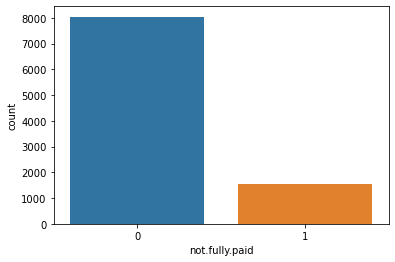

In [324]:
sns.countplot(x='not.fully.paid', data=df_1)

In [325]:
# The data set is highly imbalanced

# Exploratory Data Analysis

Text(0.5, 0, 'FICO')

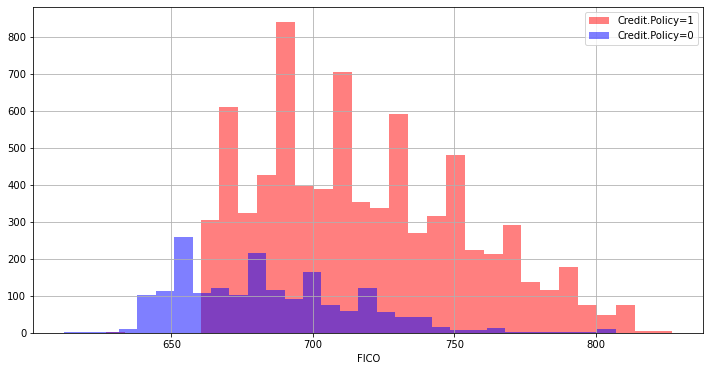

In [326]:
plt.figure(figsize=(12,6))
df_1[df_1['credit.policy']==1]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=1')
df_1[df_1['credit.policy']==0]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

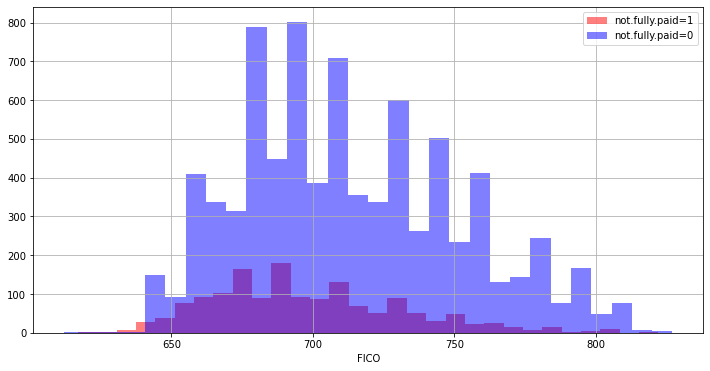

In [327]:
plt.figure(figsize=(12,6))
df_1[df_1['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=1')
df_1[df_1['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

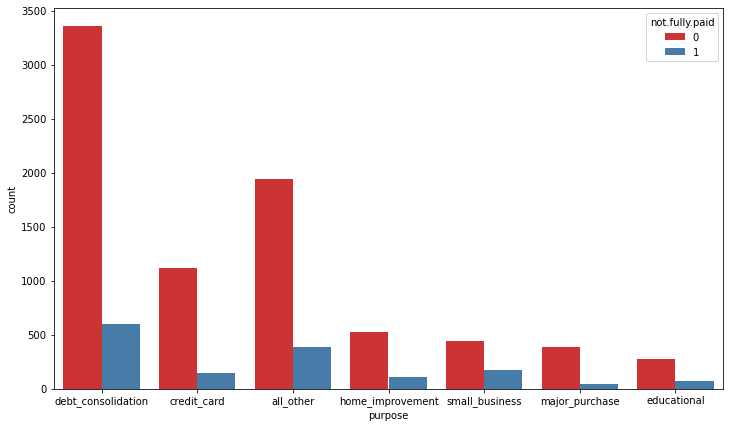

In [328]:
plt.figure(figsize=(12,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df_1,palette='Set1')

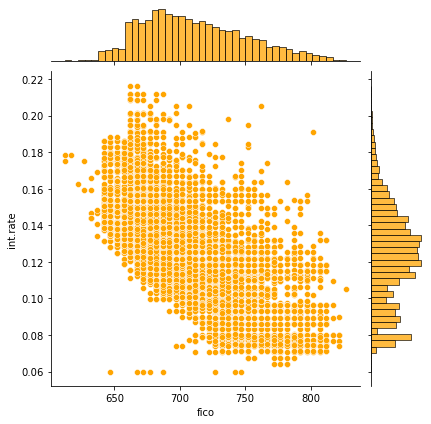

In [329]:
sns.jointplot(x='fico',y='int.rate',data=df_1,color='orange')

<Figure size 864x504 with 0 Axes>

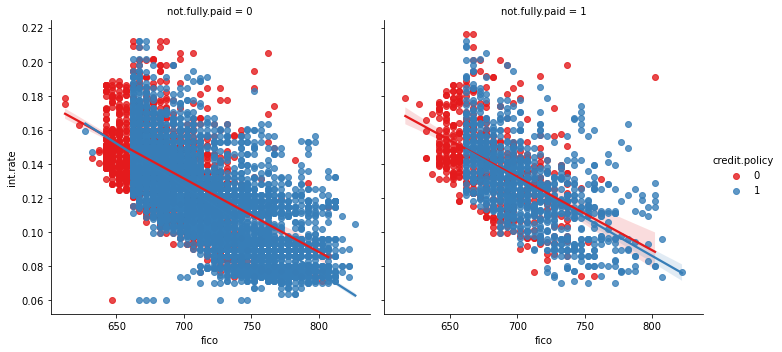

In [330]:
plt.figure(figsize=(12,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [331]:
# Transform categorical values into numerical values
df_new = pd.get_dummies(df_1,columns=['purpose'],drop_first=True) # Why ---> drop_first=True?
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   dti                         9578 non-null   float64
 4   fico                        9578 non-null   int64  
 5   days.with.cr.line           9578 non-null   float64
 6   revol.bal                   9578 non-null   int64  
 7   revol.util                  9578 non-null   float64
 8   inq.last.6mths              9578 non-null   int64  
 9   delinq.2yrs                 9578 non-null   int64  
 10  pub.rec                     9578 non-null   int64  
 11  not.fully.paid              9578 non-null   int64  
 12  annual.inc                  9578 non-null   float64
 13  purpose_credit_card         9578 

# Additional Feature Engineering

<AxesSubplot:>

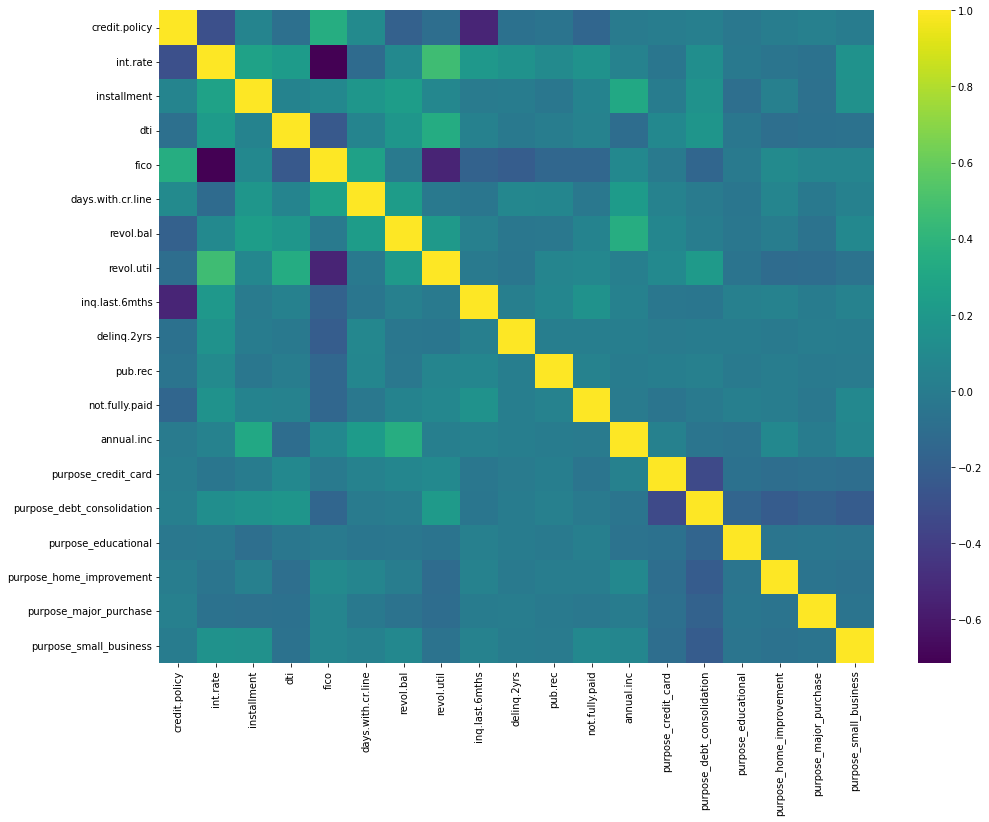

In [332]:
plt.figure(
        figsize=[16,12]
)
sns.heatmap(
        data=df_new.corr(), 
        cmap='viridis', 
        annot=False, 
        fmt='.2g'
)

In [333]:
df_new.drop(['installment','days.with.cr.line','revol.bal','revol.util'],axis=1,inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   dti                         9578 non-null   float64
 3   fico                        9578 non-null   int64  
 4   inq.last.6mths              9578 non-null   int64  
 5   delinq.2yrs                 9578 non-null   int64  
 6   pub.rec                     9578 non-null   int64  
 7   not.fully.paid              9578 non-null   int64  
 8   annual.inc                  9578 non-null   float64
 9   purpose_credit_card         9578 non-null   uint8  
 10  purpose_debt_consolidation  9578 non-null   uint8  
 11  purpose_educational         9578 non-null   uint8  
 12  purpose_home_improvement    9578 non-null   uint8  
 13  purpose_major_purchase      9578 

In [334]:
to_train = df_new[df_new['not.fully.paid'].isin([0,1])]
to_pred = df_new[df_new['not.fully.paid'] == 2]

X = to_train.drop('not.fully.paid', axis=1).values
y = to_train['not.fully.paid'].values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 123)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()

#Input Layer + HL1
model.add( Dense(19, activation='relu'))

# Hl- 2
model.add(Dense(10, activation='relu'))

# Hl- 3
model.add(Dense(5, activation='relu'))

# output layer
model.add(Dense(1, activation='sigmoid'))


In [335]:
model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
)

In [336]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=50,)

In [337]:
mdl_history = model.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
27/27 [==============================] - 1s 9ms/step - loss: 0.5636 - accuracy: 0.8373 - val_loss: 0.5185 - val_accuracy: 0.8330
Epoch 2/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4735 - accuracy: 0.8429 - val_loss: 0.4506 - val_accuracy: 0.8330
Epoch 3/200
27/27 [==============================] - 0s 4ms/step - loss: 0.4272 - accuracy: 0.8429 - val_loss: 0.4383 - val_accuracy: 0.8330
Epoch 4/200
27/27 [==============================] - 0s 4ms/step - loss: 0.4211 - accuracy: 0.8429 - val_loss: 0.4371 - val_accuracy: 0.8330
Epoch 5/200
27/27 [==============================] - 0s 4ms/step - loss: 0.4196 - accuracy: 0.8429 - val_loss: 0.4358 - val_accuracy: 0.8330
Epoch 6/200
27/27 [==============================] - 0s 4ms/step - loss: 0.4182 - accuracy: 0.8429 - val_loss: 0.4347 - val_accuracy: 0.8330
Epoch 7/200
27/27 [==============================] - 0s 4ms/step - loss: 0.4170 - accuracy: 0.8429 - val_loss: 0.4335 - val_accuracy: 0.8330
Epoch 8/200
2

Epoch 59/200
27/27 [==============================] - 0s 4ms/step - loss: 0.4072 - accuracy: 0.8429 - val_loss: 0.4249 - val_accuracy: 0.8330
Epoch 60/200
27/27 [==============================] - 0s 4ms/step - loss: 0.4070 - accuracy: 0.8429 - val_loss: 0.4243 - val_accuracy: 0.8330
Epoch 61/200
27/27 [==============================] - 0s 4ms/step - loss: 0.4068 - accuracy: 0.8429 - val_loss: 0.4244 - val_accuracy: 0.8330
Epoch 62/200
27/27 [==============================] - 0s 4ms/step - loss: 0.4068 - accuracy: 0.8429 - val_loss: 0.4246 - val_accuracy: 0.8330
Epoch 63/200
27/27 [==============================] - 0s 4ms/step - loss: 0.4070 - accuracy: 0.8429 - val_loss: 0.4243 - val_accuracy: 0.8330
Epoch 64/200
27/27 [==============================] - 0s 4ms/step - loss: 0.4067 - accuracy: 0.8429 - val_loss: 0.4243 - val_accuracy: 0.8330
Epoch 65/200
27/27 [==============================] - 0s 4ms/step - loss: 0.4067 - accuracy: 0.8429 - val_loss: 0.4243 - val_accuracy: 0.8330
Epoch 

27/27 [==============================] - 0s 4ms/step - loss: 0.4041 - accuracy: 0.8429 - val_loss: 0.4249 - val_accuracy: 0.8330
Epoch 116: early stopping


In [338]:
print(mdl_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


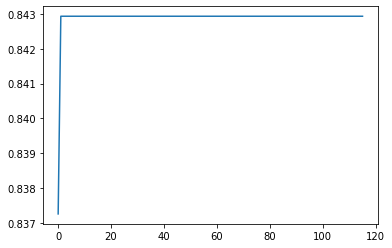

In [339]:
plt.plot(mdl_history.history['accuracy'])

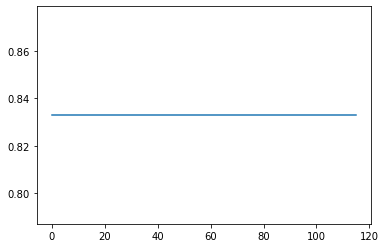

In [340]:
plt.plot(mdl_history.history['val_accuracy'])

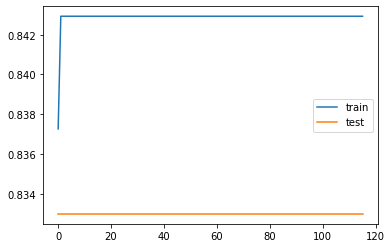

In [341]:
plt.plot(mdl_history.history['accuracy'])
plt.plot(mdl_history.history['val_accuracy'])
plt.legend(['train', 'test'])

In [342]:
pred_test = model.predict(X_test)

90/90 [==============================] - 0s 1ms/step


In [343]:
# threshold = 0.2

pred_test = (pred_test >0.2)

In [344]:
pred_test = pred_test.astype(int)

In [345]:
print('Confusion Matrix: ')
print(confusion_matrix(y_test, pred_test))

Confusion Matrix: 
[[1986  408]
 [ 296  184]]


# Printing Classification Report

In [346]:
print('Classification Report: ')
print(classification_report(y_test, pred_test))

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      2394
           1       0.31      0.38      0.34       480

    accuracy                           0.76      2874
   macro avg       0.59      0.61      0.60      2874
weighted avg       0.78      0.76      0.76      2874

